In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib
%matplotlib notebook

# Paraliste:
# timesteps = 1500
dim = 3
dens = 1
rc = 2
birthrate = 0.5
deathrate = 0.02

# Ausgabe aller Indizes
ausgabe = False
saving = False
id = 711
saving_data = False
saving_entropies = False
saving_plots = False


In [2]:
# Durchlauf
lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance', bc='reflecting',\
               density = dens, dims = dim, r_b = birthrate, variation = False, restchannels = rc ,r_d = deathrate)
lgca.timeevo_until_hom(record=True)



standard deviation set to =  0.1
Progress: [####################] 100% Done...


DATEN SPEICHERN:

In [3]:
if saving_data:
    np.save('saved_data/' + 'props_t id=' + str(id), lgca.props_t)
    np.save('saved_data/' + 'nodes_t id=' + str(id), lgca.nodes_t)
    np.savez('saved_data/' + 'Parameter id=' + str(id), density = lgca.density, restchannels = lgca.restchannels,\
             velocitychannels=lgca.l, kappa=lgca.K, rb=lgca.r_b, rd=lgca.r_d, m=lgca.r_int)
if saving_entropies:
    np.savez('saved_data/' + 'Entropies id=' + str(id), \
             shan=entropies(lgca.props_t,1), simpson=entropies(lgca.props_t,1.5), gini=entropies(lgca.props_t,2))

LADEN DER DATEN:

In [4]:
# parasammlung = np.load('saved_data/' + 'Parameter id=0'+'.npz')

# print(parasammlung.files)
# print(parasammlung['density'])
# print(parasammlung['restchannels'])
# print(parasammlung['velocitychannels'])
# print(parasammlung['kappa'])
# print(parasammlung['m'])

# propst = np.load('saved_data/' + 'props_t id=0' +'.npy')
# print(propst)

# entropies = np.load('saved_data/' + 'Entropies id=0'+'.npz')
# sh, si, gi = entropies
# print(entropies[sh], entropies[si], entropies[gi])

PLOTS:

erste Schleife fertig, nun plotbar
bin schon bei c=  0
bin schon bei c=  1
bin schon bei c=  2
bin schon bei c=  3
bin schon bei c=  4
bin schon bei c=  5
bin schon bei c=  6
bin schon bei c=  7
bin schon bei c=  8
bin schon bei c=  9
bin schon bei c=  10
bin schon bei c=  11


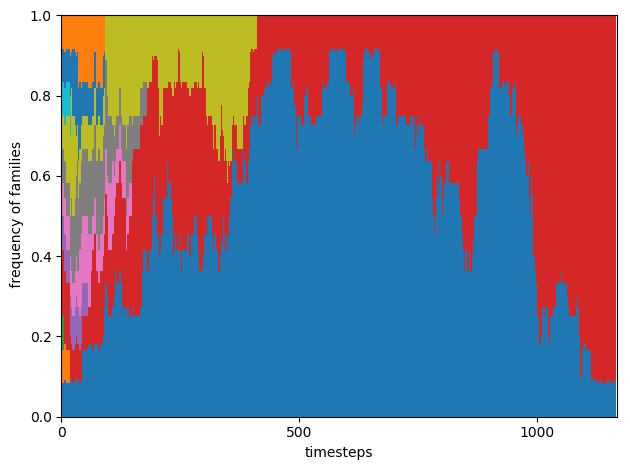

In [5]:
lgca.bar_stacked_relative()


In [6]:
# lgca.bar_stacked_relative(props_t=lgca.props_t)


# plot_entropies_together(lgca.props_t, id=id, save=saving_plots)

In [7]:
# plot_hill_together(lgca.props_t, id=id, save=saving_plots)


<IPython.core.display.Javascript object>


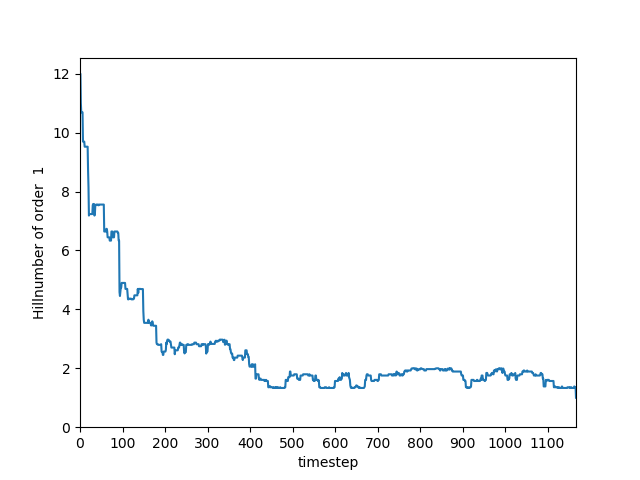

(array([12.        , 12.        , 11.        , ...,  1.33220569,
         1.35613141,  1.        ]), 12.0)

In [8]:
id = 99
%matplotlib notebook

hillnumber(lgca.props_t, order=1, save_plot=True, id=id)
# plot_hill_together(lgca.props_t, save=True, id=id)

In [9]:
# lgca.spatial_plot()

In [10]:
# lgca.spatial_plot(props_t = lgca.props_t, nodes_t=lgca.nodes_t, restchannels = lgca.restchannels, velocitychannels=lgca.velocitychannels)